# Computer Assignment #6

## Clustering

- **Ali Hamzehpour 810100129**
- **Mina Shirazi 810100250**
- **Mohammad Amin Yousefi 810100236**

### Summary
In this Computer Assignment, we will delve into dimensionality reduction and unsupervised learning tasks.Firstly, we should preprocess the provided dataset to prepare it for analysis. Next, we will apply dimensionality reduction techniques to simplify the dataset's complexity. Then, we will use unsupervised learning algorithms to tackle the task. Finally, we evaluate and analyze the results for comparison.

## Part 1: Preprocessing

In this part we are given a dataset. We should preprocess the data and extract beneficial features from it.


In [1]:
import pandas as pd 

df = pd.read_csv('diabetic_data.csv')

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

```max_glu_serum``` has a lot of none values, so we drop this column.

In [4]:
df["max_glu_serum"].value_counts()

max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64

In [5]:
df = df.drop(columns=["max_glu_serum"])

```A1Cresult``` has a lot of none values, so we drop this column.

In [6]:
df["A1Cresult"].value_counts()

A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

In [7]:
df = df.drop(columns=["A1Cresult"])

Now we try to remove duplicates but as you see, there is no duplicates in dataset.

In [8]:
print("size before duplicate removal: ", len(df))
df = df.drop_duplicates()
print("size after duplicate removal: ", len(df))

size before duplicate removal:  101766
size after duplicate removal:  101766


In [9]:
#df = df.drop(columns=["encounter_id"])

```patient_nbr``` is unique for every patient, so we drop it. 

In [10]:
df = df.drop(columns=["patient_nbr"])

In [11]:
df["race"].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [12]:
df['race'] = df['race'].replace('?', 'Other')

```LabelEncoder``` is used to convert categorical labels into numerical form. Each unique category value is assigned a number. This can be particularly useful for machine learning algorithms that require numerical input.

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['race'] = le.fit_transform(df['race'])

Since there are not many rows with unknown or invalid genders, we drop these rows.

In [14]:
df["gender"].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [15]:
df = df[df["gender"] != "Unknown/Invalid"]

Now, we set numerical values to gender column.

In [16]:
df["gender"] = le.fit_transform(df["gender"])

In [17]:
df.head()

,encounter_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,2,0,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,2,0,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,0,0,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,2,1,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,2,1,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [18]:
df["age"].value_counts()

age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [19]:
df["age"] = df["age"].map({"[0-10)": 0, "[10-20)": 1, "[20-30)": 2, "[30-40)": 3, "[40-50)": 4,
                           "[50-60)": 5, "[60-70)": 6, "[70-80)": 7, "[80-90)": 8, "[90-100)": 9})

In [20]:
df.head()

,encounter_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,2,0,0,?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,2,0,1,?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,0,0,2,?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,2,1,3,?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,2,1,4,?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


As you can see, we don't know the weight of most of patients, so we drop this culomn.

In [21]:
df["weight"].value_counts()

weight
?            98566
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [22]:
df = df.drop(columns=["weight"])

The `replace_value` function is designed to replace specified values in a DataFrame column with randomly chosen values from the remaining entries in that column, maintaining the original distribution of values. Here's a summary of how it works:

1. **Identify Values to Replace**: The function identifies the rows in the specified column that contain the values to be replaced.
2. **Calculate Distribution**: It calculates the distribution of the remaining values in the column.
3. **Generate Replacement Values**: Based on this distribution, it randomly selects replacement values for the specified entries.
4. **Replace Values**: It replaces the specified values in the original DataFrame with the randomly chosen values.

This approach ensures that the new values reflect the original distribution of the column, maintaining the statistical integrity of the dataset.

In [23]:
import pandas as pd
import numpy as np

def replace_value(column, values_to_replace):

    filtered_df = df[df[column].isin(values_to_replace)]

    other_values = df[~df[column].isin(values_to_replace)][column]
    counts = other_values.value_counts()
    total_counts = counts.sum()
    probabilities = counts / total_counts

    m = len(filtered_df)
    replacement_values = np.random.choice(other_values.unique(), size=m, p=probabilities)

    df.loc[df[column].isin(values_to_replace), column] = replacement_values



In [24]:
df["admission_type_id"].value_counts()

admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

We replace ```5:Not Available```, ```6:NULL``` and ```8:Not Mapped``` values in ```admission_type_id``` column with other values of this column with respect to their ratios.

In [25]:
replace_value("admission_type_id", [5, 6, 8])

In [26]:
df["admission_type_id"].value_counts()


admission_type_id
1    60168
3    20894
2    20665
7       22
4       14
Name: count, dtype: int64

In [27]:
# df["admission_type_id"] = df["admission_type_id"].replace([6,8], 5)
df["admission_type_id"] = df["admission_type_id"].replace(7, 5)
df["admission_type_id"].value_counts()

admission_type_id
1    60168
3    20894
2    20665
5       22
4       14
Name: count, dtype: int64

In [28]:
df["discharge_disposition_id"].value_counts()

discharge_disposition_id
1     60232
3     13954
6     12902
18     3691
2      2128
22     1992
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In this section, we combine some values that are similar to ensure better analysis. we also droped the rows with value ```12``` becuase they are still in hospital.

In [29]:
df["discharge_disposition_id"] = df["discharge_disposition_id"].replace([20,19], 11)
df= df[df["discharge_disposition_id"] != 12]
df["discharge_disposition_id"] = df["discharge_disposition_id"].replace([10,27], 2)
df["discharge_disposition_id"] = df["discharge_disposition_id"].replace([16,17], 15)

df["discharge_disposition_id"].value_counts()

discharge_disposition_id
1     60232
3     13954
6     12902
18     3691
2      2139
22     1992
11     1652
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       88
24       48
9        21
Name: count, dtype: int64

In [30]:
replace_value("discharge_disposition_id", [18, 25, 26])

In [31]:
df["discharge_disposition_id"].value_counts()

discharge_disposition_id
1     63106
3     14650
6     13506
2      2233
22     1999
11     1734
5      1292
4       851
7       692
13      422
23      422
14      395
28      140
8       133
15      107
24       52
9        26
Name: count, dtype: int64

In [32]:
df["discharge_disposition_id"]= le.fit_transform(df["discharge_disposition_id"])
df["discharge_disposition_id"].value_counts()

discharge_disposition_id
0     63106
2     14650
5     13506
1      2233
13     1999
9      1734
4      1292
3       851
6       692
10      422
14      422
11      395
16      140
7       133
12      107
15       52
8        26
Name: count, dtype: int64

In [33]:
df.head()


,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,2,0,0,1,0,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,2,0,1,1,0,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,0,0,2,1,0,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,2,1,3,1,0,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,2,1,4,1,0,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [34]:
df["admission_source_id"].value_counts()

admission_source_id
7     57492
1     29561
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64

In [35]:
df["admission_source_id"] = df["admission_source_id"].replace([10,22], 4)
df = df[~df["admission_source_id"].isin([8,13, 25, 11, 14])]
df["admission_source_id"].value_counts()

admission_source_id
7     57492
1     29561
17     6781
4      3207
6      2264
2      1104
5       855
3       187
20      161
9       125
Name: count, dtype: int64

In [36]:
replace_value("admission_source_id", [17, 15, 21])

In [37]:
df["admission_source_id"]= le.fit_transform(df["admission_source_id"])
df["admission_source_id"].value_counts()

admission_source_id
6    59544
0    33689
3     3373
5     2323
1     1347
4      949
2      202
8      179
7      131
Name: count, dtype: int64

In [38]:
df["time_in_hospital"].describe()

count    101737.000000
mean          4.395903
std           2.984880
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

```payer_code``` is ```?``` for most of patients, so we drop it.

In [39]:
df = df.drop(columns=["payer_code"])

Since about 50% of ```medical_specialty``` is ```?```, we drop this column.

In [40]:
df["medical_specialty"].value_counts()

medical_specialty
?                                49938
InternalMedicine                 14629
Emergency/Trauma                  7561
Family/GeneralPractice            7439
Cardiology                        5351
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64

In [41]:
df = df.drop(columns=["medical_specialty"])

In [42]:
df["number_emergency"].value_counts()

number_emergency
0     90356
1      7677
2      2041
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
19        4
20        4
18        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: count, dtype: int64

In [43]:
df["diag_1"].value_counts()

diag_1
428    6862
414    6579
786    4013
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: count, Length: 717, dtype: int64

Now we fill `?` values in `diag_1`, `diag_2` and `diag_3`.

In [44]:
df[df["diag_1"] == "?"].size

924

In [45]:
df[df["diag_2"] == "?"].shape[0]

357

In [46]:
df[df["diag_3"] == "?"].shape[0]

1422

In [47]:
replace_value("diag_1", ["?"])

In [48]:
replace_value("diag_2", ["?"])

In [49]:
replace_value("diag_3", ["?"])

Then, we categorise values in `diag_1`, `diag_2` and `diag_3`.

In [50]:
def map_icd_to_category(icd):
    code_prefix = icd[:3]
    if '001' <= code_prefix <= '139':
        return 'Infectious and Parasitic Diseases'
    elif '140' <= code_prefix <= '239':
        return 'Neoplasms'
    elif '240' <= code_prefix <= '279':
        return 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
    elif '280' <= code_prefix <= '289':
        return 'Diseases of the Blood and Blood-Forming Organs'
    elif '290' <= code_prefix <= '319':
        return 'Mental Disorders'
    elif '320' <= code_prefix <= '389':
        return 'Diseases of the Nervous System and Sense Organs'
    elif '390' <= code_prefix <= '459':
        return 'Diseases of the Circulatory System'
    elif '460' <= code_prefix <= '519':
        return 'Diseases of the Respiratory System'
    elif '520' <= code_prefix <= '579':
        return 'Diseases of the Digestive System'
    elif '580' <= code_prefix <= '629':
        return 'Diseases of the Genitourinary System'
    elif '630' <= code_prefix <= '679':
        return 'Complications of Pregnancy, Childbirth, and the Puerperium'
    elif '680' <= code_prefix <= '709':
        return 'Diseases of the Skin and Subcutaneous Tissue'
    elif '710' <= code_prefix <= '739':
        return 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif '740' <= code_prefix <= '759':
        return 'Congenital Anomalies'
    elif '760' <= code_prefix <= '779':
        return 'Certain Conditions Originating in the Perinatal Period'
    elif '780' <= code_prefix <= '799':
        return 'Symptoms, Signs, and Ill-Defined Conditions'
    elif '800' <= code_prefix <= '999':
        return 'Injury and Poisoning'
    else:
        return 'External Causes of Injury and Supplemental Classification (E and V codes)'

df['diag_1'] = df['diag_1'].apply(map_icd_to_category)
df['diag_2'] = df['diag_2'].apply(map_icd_to_category)
df['diag_3'] = df['diag_3'].apply(map_icd_to_category)



In [51]:
df['diag_1'].value_counts()

diag_1
Diseases of the Circulatory System                                           30389
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders        11462
Diseases of the Respiratory System                                           10450
Diseases of the Digestive System                                              9277
Symptoms, Signs, and Ill-Defined Conditions                                   7720
Injury and Poisoning                                                          7041
Diseases of the Genitourinary System                                          5079
Diseases of the Musculoskeletal System and Connective Tissue                  4959
Neoplasms                                                                     3436
Diseases of the Nervous System and Sense Organs                               2917
Diseases of the Skin and Subcutaneous Tissue                                  2578
Mental Disorders                                                              22

After categorizing values, we convert their categories to numericals.

In [52]:
df["diag_1"] = le.fit_transform(df["diag_1"])
df["diag_2"] = le.fit_transform(df["diag_2"])
df["diag_3"] = le.fit_transform(df["diag_3"])

In [53]:
#df.drop(columns=["number_diagnoses"], inplace=True)

In [54]:
drugs = "metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone"
list_drugs = drugs.split(",")
list_drugs


['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [55]:
for drug in list_drugs:
    print(df[drug].value_counts())

metformin
No        81757
Steady    18339
Up         1066
Down        575
Name: count, dtype: int64
repaglinide
No        100199
Steady      1384
Up           109
Down          45
Name: count, dtype: int64
nateglinide
No        101034
Steady       668
Up            24
Down          11
Name: count, dtype: int64
chlorpropamide
No        101651
Steady        79
Up             6
Down           1
Name: count, dtype: int64
glimepiride
No        96547
Steady     4669
Up          327
Down        194
Name: count, dtype: int64
acetohexamide
No        101736
Steady         1
Name: count, dtype: int64
glipizide
No        89056
Steady    11351
Up          770
Down        560
Name: count, dtype: int64
glyburide
No        91094
Steady     9267
Up          812
Down        564
Name: count, dtype: int64
tolbutamide
No        101714
Steady        23
Name: count, dtype: int64
pioglitazone
No        94412
Steady     6973
Up          234
Down        118
Name: count, dtype: int64
rosiglitazone
No        9537

In [56]:
_ = le.fit(df["metformin"])

In [57]:
for drug in list_drugs:
    df[drug] = le.transform(df[drug])

In [58]:
df["change"].value_counts()

change
No    54742
Ch    46995
Name: count, dtype: int64

In [59]:
df["change"] = le.fit_transform(df["change"])

In [60]:
df["readmitted"].value_counts()

readmitted
NO     54843
>30    35541
<30    11353
Name: count, dtype: int64

In [61]:
df["readmitted"] = le.fit_transform(df["readmitted"])

In [62]:
df["diabetesMed"].value_counts()

diabetesMed
Yes    78340
No     23397
Name: count, dtype: int64

In [63]:
df["diabetesMed"] = df["diabetesMed"].map({"Yes": 1, "No": 0})

In [64]:
df.head()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,2,0,0,1,0,0,1,41,0,...,1,1,1,1,1,1,1,1,0,2
1,149190,2,0,1,1,0,6,3,59,0,...,1,3,1,1,1,1,1,0,1,1
2,64410,0,0,2,1,0,6,2,11,5,...,1,1,1,1,1,1,1,1,1,2
3,500364,2,1,3,1,0,6,2,44,1,...,1,3,1,1,1,1,1,0,1,2
4,16680,2,1,4,1,0,6,1,51,0,...,1,2,1,1,1,1,1,0,1,2


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101737 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101737 non-null  int64
 1   race                      101737 non-null  int32
 2   gender                    101737 non-null  int32
 3   age                       101737 non-null  int64
 4   admission_type_id         101737 non-null  int64
 5   discharge_disposition_id  101737 non-null  int64
 6   admission_source_id       101737 non-null  int64
 7   time_in_hospital          101737 non-null  int64
 8   num_lab_procedures        101737 non-null  int64
 9   num_procedures            101737 non-null  int64
 10  num_medications           101737 non-null  int64
 11  number_outpatient         101737 non-null  int64
 12  number_emergency          101737 non-null  int64
 13  number_inpatient          101737 non-null  int64
 14  diag_1                   

In [66]:
df.describe()

,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017370e+05,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000,...,101737.0,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000,101737.000000
mean,1.651926e+08,1.710410,0.462369,6.096808,1.614978,1.694654,3.802884,4.395903,43.097093,1.339660,...,1.0,1.405497,1.006900,1.000128,1.000010,1.000020,1.000010,0.538074,0.770025,1.427475
std,1.026309e+08,0.919758,0.498584,1.594022,0.806755,2.943529,2.797026,2.984880,19.672010,1.705754,...,0.0,0.838822,0.084426,0.011303,0.003135,0.004434,0.003135,0.498551,0.420819,0.684053
min,1.252200e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,8.496487e+07,2.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,31.000000,0.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,1.523824e+08,2.000000,0.000000,6.000000,1.000000,0.000000,6.000000,4.000000,44.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,2.302488e+08,2.000000,1.000000,7.000000,2.000000,2.000000,6.000000,6.000000,57.000000,2.000000,...,1.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,4.438672e+08,4.000000,1.000000,9.000000,5.000000,16.000000,8.000000,14.000000,132.000000,6.000000,...,1.0,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000


```encounter_id``` is unique, so we drop this column.

In [67]:
ids = df["encounter_id"]
df.drop(columns = ["encounter_id"], inplace = True)

Now we standardize our data with ```StandardScaler```. It transforms the features by subtracting the mean and dividing by the standard deviation of each feature, resulting in a feature with zero mean and unit variance.

In [68]:
from sklearn.preprocessing import StandardScaler

for col in df.columns:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]]).flatten()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101737 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101737 non-null  float64
 1   gender                    101737 non-null  float64
 2   age                       101737 non-null  float64
 3   admission_type_id         101737 non-null  float64
 4   discharge_disposition_id  101737 non-null  float64
 5   admission_source_id       101737 non-null  float64
 6   time_in_hospital          101737 non-null  float64
 7   num_lab_procedures        101737 non-null  float64
 8   num_procedures            101737 non-null  float64
 9   num_medications           101737 non-null  float64
 10  number_outpatient         101737 non-null  float64
 11  number_emergency          101737 non-null  float64
 12  number_inpatient          101737 non-null  float64
 13  diag_1                    101737 non-null  float6

This function detects outliers and gives us two dataframes, one for outliers and the other is for main df except outliers.

The ```Isolation Forest``` (also known as the Isolation Tree) is a powerful unsupervised anomaly detection algorithm that identifies outliers in a dataset.
The key principles behind the Isolation Forest algorithm are:

1. **Isolation**: The algorithm isolates outliers by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This process is repeated recursively until an observation is isolated.

2. **Anomaly Score**: The number of splits required to isolate a data point is used to calculate its anomaly score. Data points that require fewer splits to isolate are more likely to be outliers, as they are more isolated from the rest of the data.

3. **Contamination**: The algorithm requires a contamination parameter, which is the expected fraction of outliers in the dataset. This helps the algorithm determine the appropriate threshold for identifying outliers.

In [70]:
from sklearn.ensemble import IsolationForest

def detect_outliers(df, n_estimators, contamination):
    df_copy = df.copy()
    iso = IsolationForest(n_estimators=n_estimators, contamination=contamination ,random_state=42)
    df_copy['outlier'] = iso.fit_predict(df_copy)
    df_outliers = df_copy[df_copy['outlier'] == -1]
    df_copy = df_copy[df_copy['outlier'] == 1]
    df_copy.drop('outlier', axis=1, inplace=True)
    return df_copy, df_outliers

df, _ = detect_outliers(df, 50, 0.2)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81389 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      81389 non-null  float64
 1   gender                    81389 non-null  float64
 2   age                       81389 non-null  float64
 3   admission_type_id         81389 non-null  float64
 4   discharge_disposition_id  81389 non-null  float64
 5   admission_source_id       81389 non-null  float64
 6   time_in_hospital          81389 non-null  float64
 7   num_lab_procedures        81389 non-null  float64
 8   num_procedures            81389 non-null  float64
 9   num_medications           81389 non-null  float64
 10  number_outpatient         81389 non-null  float64
 11  number_emergency          81389 non-null  float64
 12  number_inpatient          81389 non-null  float64
 13  diag_1                    81389 non-null  float64
 14  diag_2    

In [72]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0.314856,-0.927368,-3.824815,-0.762289,-0.575725,-1.359623,-1.137707,-0.106603,-0.785381,-1.848284,...,0.0,-0.483415,-0.08173,-0.011305,-0.003135,-0.004434,-0.003135,0.926543,-1.829834,0.836965
1,0.314856,-0.927368,-3.197468,-0.762289,-0.575725,0.785522,-0.467660,0.808407,-0.785381,0.243405,...,0.0,1.900895,-0.08173,-0.011305,-0.003135,-0.004434,-0.003135,-1.079281,0.546498,-0.624918
3,0.314856,1.078321,-1.942774,-0.762289,-0.575725,0.785522,-0.802684,0.045898,-0.199127,-0.002676,...,0.0,1.900895,-0.08173,-0.011305,-0.003135,-0.004434,-0.003135,-1.079281,0.546498,0.836965
4,0.314856,1.078321,-1.315427,-0.762289,-0.575725,0.785522,-1.137707,0.401736,-0.785381,-0.987000,...,0.0,0.708740,-0.08173,-0.011305,-0.003135,-0.004434,-0.003135,-1.079281,0.546498,0.836965
5,0.314856,1.078321,-0.688080,0.477250,-0.575725,-1.002099,-0.467660,-0.614942,2.732143,-0.002676,...,0.0,0.708740,-0.08173,-0.011305,-0.003135,-0.004434,-0.003135,0.926543,0.546498,-0.624918


In [73]:
df.describe()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,...,81389.0,81389.000000,81389.000000,81389.000000,81389.000000,81389.000000,8.138900e+04,81389.000000,81389.000000,81389.000000
mean,0.024786,-0.012142,0.039526,-0.125561,-0.082995,0.096180,-0.043934,0.018433,-0.059041,-0.082275,...,0.0,0.004952,-0.012602,0.002826,0.000784,-0.001663,-3.135181e-03,0.109219,-0.038644,0.090496
std,0.954498,0.999015,0.978658,0.930925,0.865769,0.968282,0.952701,0.982837,0.955340,0.903958,...,0.0,0.971578,0.921142,1.118027,1.118044,0.790580,1.301051e-18,0.985597,1.023774,0.931633
min,-1.859639,-0.927368,-3.824815,-0.762289,-0.575725,-1.359623,-1.137707,-2.139959,-0.785381,-1.848284,...,0.0,-1.675569,-11.926420,-0.011305,-0.003135,-0.004434,-3.135181e-03,-1.079281,-1.829834,-2.086801
25%,0.314856,-0.927368,-0.688080,-0.762289,-0.575725,-1.359623,-0.802684,-0.564108,-0.785381,-0.740919,...,0.0,-0.483415,-0.081730,-0.011305,-0.003135,-0.004434,-3.135181e-03,-1.079281,0.546498,-0.624918
50%,0.314856,-0.927368,-0.060732,-0.762289,-0.575725,0.785522,-0.132637,0.096732,-0.199127,-0.248757,...,0.0,-0.483415,-0.081730,-0.011305,-0.003135,-0.004434,-3.135181e-03,0.926543,0.546498,0.836965
75%,0.314856,1.078321,0.566615,0.477250,0.103735,0.785522,0.537410,0.706739,0.387127,0.366445,...,0.0,0.708740,-0.081730,-0.011305,-0.003135,-0.004434,-3.135181e-03,0.926543,0.546498,0.836965
max,2.489351,1.078321,1.821309,4.195868,4.859955,1.500571,3.217598,3.960108,2.732143,7.133672,...,0.0,1.900895,23.607651,88.458595,318.960813,225.538245,-3.135181e-03,0.926543,0.546498,0.836965


In [74]:
len(df.columns)

43

# Part 2: Dimensionality Reduction

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_CEV_for_pca(X):
    max_components = min(X.shape)
    explained_variances = []
    for n in range(1, max_components + 1):
        pca = PCA(n_components=n)
        X_pca = pca.fit_transform(X)
        cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
        explained_variances.append(cumulative_explained_variance[-1])

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), explained_variances, marker='o', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance for Different Numbers of Principal Components')
    plt.axhline(y=0.9, color='g', linestyle='--')
    plt.axhline(y=1.0, color='r', linestyle='--')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()


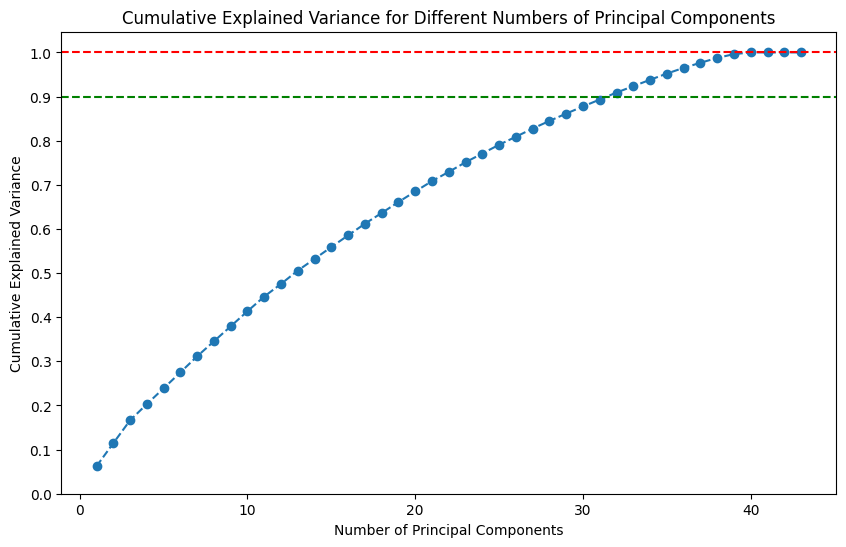

In [76]:
X = df.values
plot_CEV_for_pca(X)

As you can see, to cover 90% of variance, num_components parameter in pca should be more than 31 but it decreases silhouette score of our models. After trying several values for num_components, we set that to 3 to achieve the best silhouette score.

In [77]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Part 3: Unsupervised Learning

In this part, we use elbow rule to choose the best K for K-means model. We try several values for K and we choose the one which has better score with respect to avoiding overfitting.

C:\Users\HI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HI\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HI\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\HI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

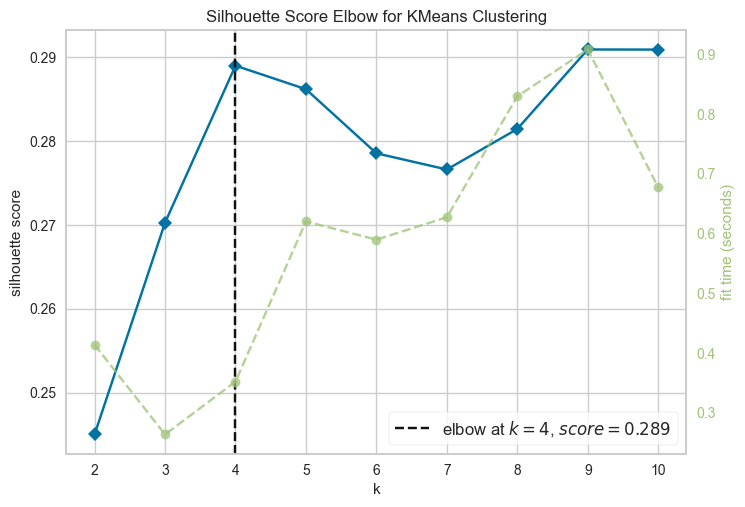

The optimal number of clusters is 4


In [78]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=True)
visualizer.fit(X_pca)
visualizer.show()
optimal_k = visualizer.elbow_value_
print(f"The optimal number of clusters is {optimal_k}")

In [79]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(
    n_clusters=4,
    init="k-means++",
    random_state=42,
)

kmeans.fit(X_pca)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(silhouette_score(X_pca, labels))

C:\Users\HI\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.2889882740587231


In [91]:
len(labels)

81389

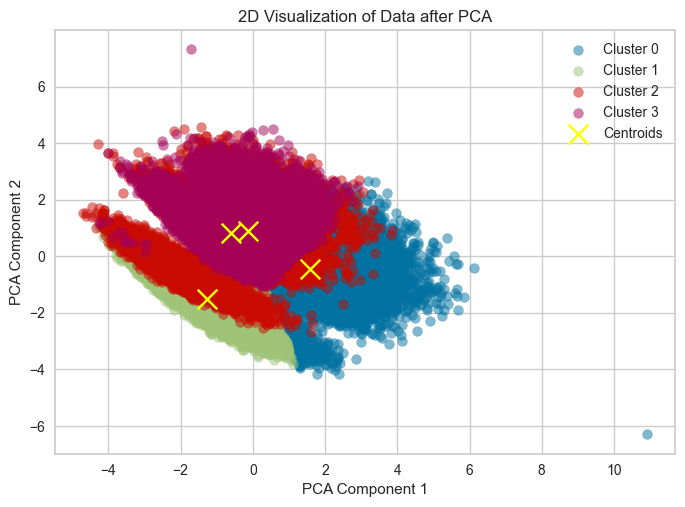

In [93]:
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_pca)
for label in set(labels):
    plt.scatter(X_pca_2d[labels == label, 0], X_pca_2d[labels == label, 1], label=f'Cluster {label}', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', marker='x', s=200, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Data after PCA')
plt.legend()
plt.show()

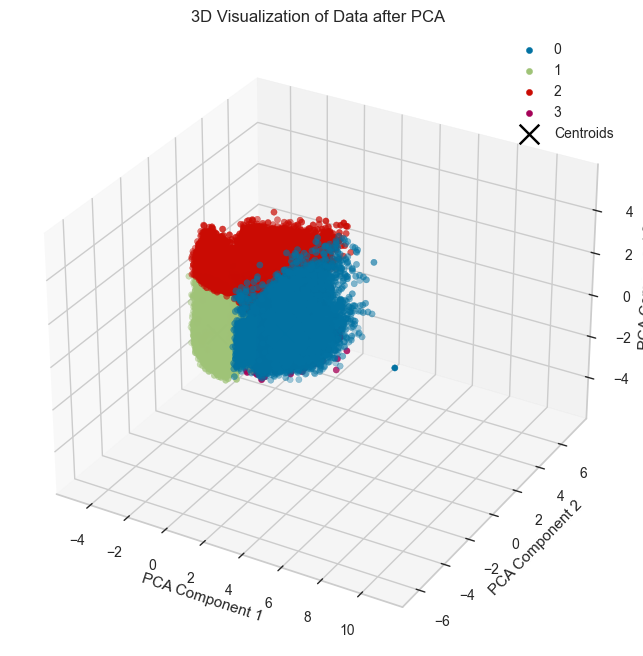

In [97]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in set(labels):
    ax.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], X_pca[labels == label, 2], label=label)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', marker='x', s=200, label='Centroids')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D Visualization of Data after PCA')
plt.legend()
plt.show()


Grid search on eps and min_samples can help us to find the best parameters for DBSCAN.

In [98]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

eps_values = np.arange(0.4, 1.0, 0.1)
min_samples_values = range(4, 11)
best_score = -1
best_params = None
best_labels = None
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_pca)
        labels = dbscan.labels_
        if len(set(labels)) > 1 and len(set(labels)) != 1 + (labels == -1).sum():
            score = silhouette_score(X_pca, labels)
            print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score:.3f}")
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels

print(f"Best params: eps={best_params[0]}, min_samples={best_params[1]}, Silhouette Score={best_score:.3f}")

eps: 0.4, min_samples: 4, Silhouette Score: 0.310
eps: 0.4, min_samples: 5, Silhouette Score: 0.249
eps: 0.4, min_samples: 6, Silhouette Score: 0.359
eps: 0.4, min_samples: 7, Silhouette Score: 0.327
eps: 0.4, min_samples: 8, Silhouette Score: 0.406
eps: 0.4, min_samples: 9, Silhouette Score: 0.357
eps: 0.4, min_samples: 10, Silhouette Score: 0.194
eps: 0.5, min_samples: 4, Silhouette Score: 0.351
eps: 0.5, min_samples: 5, Silhouette Score: 0.382
eps: 0.5, min_samples: 6, Silhouette Score: 0.444
eps: 0.5, min_samples: 7, Silhouette Score: 0.441
eps: 0.5, min_samples: 8, Silhouette Score: 0.440
eps: 0.5, min_samples: 9, Silhouette Score: 0.435
eps: 0.5, min_samples: 10, Silhouette Score: 0.434
eps: 0.6, min_samples: 4, Silhouette Score: 0.482
eps: 0.6, min_samples: 5, Silhouette Score: 0.484
eps: 0.6, min_samples: 6, Silhouette Score: 0.438
eps: 0.6, min_samples: 7, Silhouette Score: 0.467
eps: 0.6, min_samples: 8, Silhouette Score: 0.466
eps: 0.6, min_samples: 9, Silhouette Score: 0.45

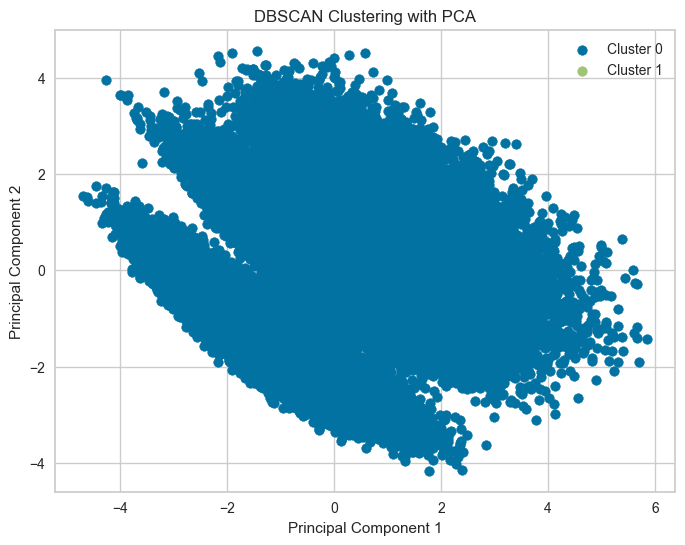

In [104]:
pca = PCA(n_components=2, random_state=42)
X_pca_2d = pca.fit_transform(X_pca)
plt.figure(figsize=(8, 6))
for cluster in range(len(set(best_labels))):
    plt.scatter(X_pca_2d[labels == cluster, 0], X_pca_2d[labels == cluster, 1], label=f'Cluster {cluster}')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


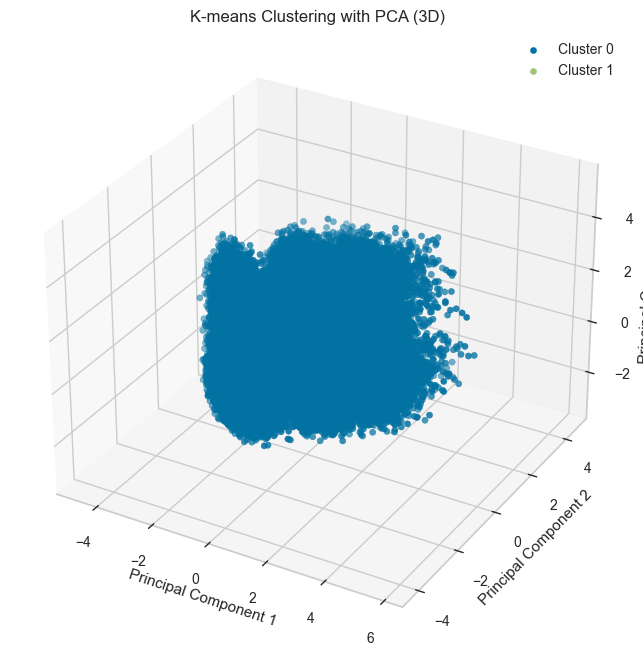

In [105]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(len(set(best_labels))):
    ax.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], X_pca[labels == cluster, 2], label=f'Cluster {cluster}')
ax.set_title('K-means Clustering with PCA (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


# Questions

**1.What preprocessing steps did you perform on the dataset? Provide clear reasons for each decision made.**

this question is answered above in preprocessing part.


**2.What portion of the dataset did you retain during dimensionality reduction, and which variables were retained? Could you elaborate on the rationale behind this decision?**

as shown above, after preprocessing, we had 43 columns and if we wanted to cover 90% of variance, we were supposed to have 32 or more dimentions after PCA but this could decrease our scores. so we chose 3 component to have a better clustering.

**3.Include a plot illustrating the silhouette coefficient plotted against the input parameters for each clustering method within the report file.**

this question is answered above in last part.

**4.How can we determine the optimal number of clusters in K-Means?**
- Elbow Method: The Elbow Method involves running K-Means clustering on the dataset for a range of values for k (number of clusters), and for each value of k, calculating the within-cluster sum of squares (WCSS), also known as the inertia. The idea is to choose the  k at which the WCSS begins to decrease at a slower rate, creating an "elbow" shape on the graph.

- Silhouette Score: The Silhouette Score measures how similar a point is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher value indicates better-defined clusters.

- Gap Statistic: The Gap Statistic compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data.

**5.How can we determine the optimal epsilon value and minPts in DBSCAN?**
- Determining epsilon (ε) using the k-distance graph: The k-distance graph helps to identify a suitable epsilon value. This graph plots the distance to the k-th nearest neighbor for each point, sorted in ascending order. The "elbow" or knee in the graph indicates an appropriate choice for epsilon.
- Determining minPts: A good heuristic for minPts is to set it to be at least D + 1, where D is the number of dimensions in the dataset. However, it often makes sense to try a few values (e.g., between 4 and 10) and compare results.
- Grid Search: try different combinations of epsilon and minPts and evaluate their effectiveness.

**6.When would you recommend using K-Means, and when would you suggest using DBSCAN instead?**
- Use K-Means When:
    - Clusters are spherical or convex.
    - The number of clusters is known and predefined.
    - Data is large, uniform, and has clusters of similar sizes.
    - Outliers and noise are minimal or have been removed.

- Use DBSCAN When:
    - Clusters have arbitrary shapes.
    - The number of clusters is unknown.
    - Data has significant noise or outliers.
    - Clusters vary in size and density.
    - Working with spatial data.
